In [ ]:
# Importing needed Packe
import matplotlib.pyplot as plt
from datetime import date, timedelta

%matplotlib inlineges
import requests
import numpy as np
import pandas as pd

In [65]:
# Getting cryptocurrency and vs_currency and days from the user
crypto_id = input("Enter Id: ")
vs_currency = input("Enter vs_currency: ")
days = int(input("Enter the number of how many days ago you want(e.g: 1,14,30): "))

Enter Id:  bitcoin
Enter vs_currency:  usd
Enter the number of how many days ago you want(e.g: 1,14,30):  10


#### Showing cryptocurrency's date in a DataFrame

In [66]:
req = requests.get("https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=%s&days=%s&interval=daily" % (crypto_id, vs_currency, days-1)) # Sending the request

dates = pd.Series([date.today() - timedelta(days = day) for day in range(days)]) # Series of last 10 dates
prices = pd.Series(reversed([price[1] for price in req.json()['prices']])) # Series of last 10 days prices
market_caps = pd.Series(reversed([mk[1] for mk in req.json()['market_caps']])) # Series of last 10 days marker caps
total_volumes = pd.Series(reversed([tv[1] for tv in req.json()['total_volumes']])) # Series of last 10 days total volumes
# Cryptocurrency's DataFrame
crypto_df = pd.DataFrame(
    {
        'Price':prices,
        'Marker Caps':market_caps,
        'Total Volumes':total_volumes
    },
)
crypto_df.index = dates
crypto_df

,Price,Marker Caps,Total Volumes
2022-07-06,20355.946383,3.873835e+11,2.457993e+10
2022-07-05,20257.012329,3.864252e+11,1.863486e+10
2022-07-04,19310.233219,3.685494e+11,1.397697e+10
2022-07-03,19268.227003,3.677067e+11,1.560172e+10
2022-07-02,19407.447430,3.709165e+11,2.875678e+10
2022-07-01,19608.397493,3.659842e+11,2.281652e+10
2022-06-30,20108.529473,3.840679e+11,2.074433e+10
2022-06-29,20282.542479,3.866069e+11,1.816121e+10
2022-06-28,20751.477531,3.959146e+11,1.771901e+10
2022-06-27,21052.805398,4.016458e+11,1.539270e+10


#### Showing cryptocurrency's data in Charts

Choose your desire chart between the options(number):
1. Plot
2. Bar


 1


<Figure size 7200x1440 with 0 Axes>

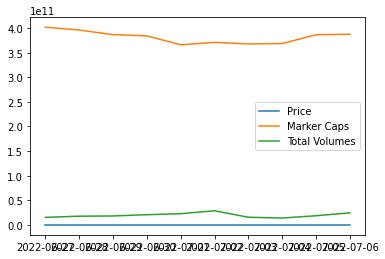

In [72]:
print("Choose your desire chart between the options(number):")
print("1. Plot\n2. Bar")
chart = input("")
if chart == '1': # Plot
    plt.figure(figsize=(100,20))
    crypto_df.plot()